In [2]:
import os
import sys
import glob
import pandas as pd
import numpy as np
import math
import scanpy as sc
import anndata as ad
import matplotlib.pyplot as plt
import scvelo as scv

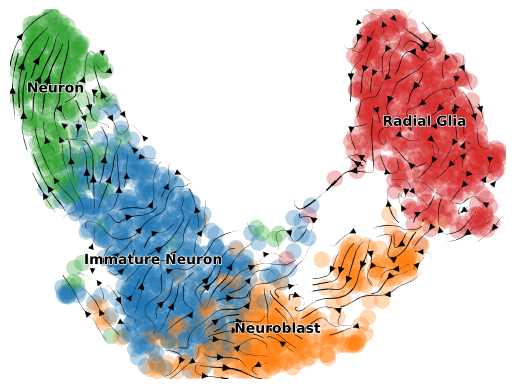

In [3]:
adata2 = scv.read("/home/liyr/hpz/real_data_graph/Forebrain/scvelo_dynamical.h5ad")
adata2
scv.pl.velocity_embedding_stream(adata2, color= "clusters", dpi=100, title='')

In [6]:
adata2

AnnData object with n_obs × n_vars = 1720 × 1995
    obs: 'clusters', 'initial_size_unspliced', 'initial_size_spliced', 'initial_size', 'n_counts', 'velocity_self_transition'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'gene_count_corr', 'means', 'dispersions', 'dispersions_norm', 'highly_variable', 'fit_alpha', 'fit_beta', 'fit_gamma', 'fit_t_', 'fit_scaling', 'fit_std_u', 'fit_std_s', 'fit_likelihood', 'fit_u0', 'fit_s0', 'fit_pval_steady', 'fit_steady_u', 'fit_steady_s', 'fit_variance', 'fit_alignment_scaling', 'fit_r2', 'velocity_genes'
    uns: 'clusters_colors', 'neighbors', 'pca', 'recover_dynamics', 'velocity_graph', 'velocity_graph_neg', 'velocity_params'
    obsm: 'X_pca', 'X_umap', 'velocity_umap'
    varm: 'PCs', 'loss'
    layers: 'Ms', 'Mu', 'ambiguous', 'fit_t', 'fit_tau', 'fit_tau_', 'matrix', 'spliced', 'unspliced', 'velocity', 'velocity_u'
    obsp: 'connectivities', 'distances'

In [7]:
scv.tl.rank_velocity_genes(adata2, n_genes=200,  groupby='clusters', min_corr=.3)

df = pd.DataFrame(adata2.uns['rank_velocity_genes']['names'])
df.head()

ranking velocity genes
    finished (0:00:00) --> added 
    'rank_velocity_genes', sorted scores by group ids (adata.uns) 
    'spearmans_score', spearmans correlation scores (adata.var)


,Immature Neuron,Neuroblast,Neuron,Radial Glia
0,KIAA1324,BCL11A,TNR,NEUROD6
1,TTYH1,STMN2,MSRA,GLI3
2,ATP1A3,PLXNA4,DYNC1I1,STK3
3,GRIA2,TTYH1,OCA2,STMN2
4,PTPRS,LPHN3,PRICKLE2,TCF7L2


In [8]:
df2 = pd.DataFrame(adata2.uns['rank_velocity_genes']['scores'])
df2.head()

,Immature Neuron,Neuroblast,Neuron,Radial Glia
0,13.63,8.54,9.90,28.85
1,10.60,8.38,9.78,20.91
2,9.33,6.91,9.40,14.52
3,8.87,6.37,9.17,14.20
4,8.85,6.11,6.92,13.75


In [9]:
df.to_csv("/home/liyr/zxc/top_like_genes/res/scvelo_dynamical.csv")
df2.to_csv("/home/liyr/zxc/top_like_genes/res/scvelo_dynamical_score.csv")

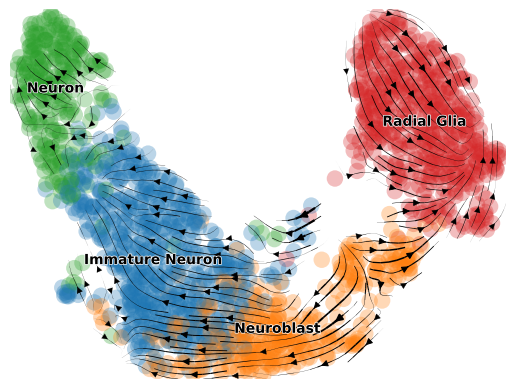

In [10]:
adata2 = scv.read("/home/liyr/hpz/real_data_graph/Forebrain/scvelo_stochastic.h5ad")
adata2
scv.pl.velocity_embedding_stream(adata2, color= "clusters", dpi=100, title='')

In [11]:
scv.tl.rank_velocity_genes(adata2,n_genes=200, groupby='clusters', min_corr=.3)

df = pd.DataFrame(adata2.uns['rank_velocity_genes']['names'])
df.head()

ranking velocity genes
    finished (0:00:00) --> added 
    'rank_velocity_genes', sorted scores by group ids (adata.uns) 
    'spearmans_score', spearmans correlation scores (adata.var)


,Immature Neuron,Neuroblast,Neuron,Radial Glia
0,CNTNAP2,ST18,LRRTM4,TCF7L2
1,NTM,ROBO2,RGS6,NFATC2
2,ATP1A3,LINC01158,LRP1B,STK3
3,GRIA2,LRRC16A,SSBP3,BMPR1B
4,NNAT,EBF2,ANK3,COL4A6


In [12]:
df2 = pd.DataFrame(adata2.uns['rank_velocity_genes']['scores'])
df2.head()

,Immature Neuron,Neuroblast,Neuron,Radial Glia
0,40.930000,31.620001,37.889999,59.680000
1,37.150002,26.600000,35.009998,58.880001
2,30.809999,24.889999,33.570000,53.169998
3,28.559999,24.549999,30.969999,46.689999
4,24.889999,24.290001,30.070000,44.939999


In [13]:
df.to_csv("/home/liyr/zxc/top_like_genes/res/scvelo_stochastic.csv")
df2.to_csv("/home/liyr/zxc/top_like_genes/res/scvelo_stochastic_score.csv")